# Machine Learning Strategy

Let's talk about **how to effectively structure and optimize machine learning projects**, especially in the era of deep learning. How to make **smart, data-driven decisions** when improving a model, rather than wasting time trying random techniques.

* How to **prioritize ideas** (e.g., collecting more data, tuning hyperparameters, changing architectures) based on impact.
* How to **diagnose bottlenecks** in your system's performance.
* How to **avoid wasting months** on ineffective solutions.
* Practical strategies derived from **real-world experience**, not just theory.
* Why traditional ML tactics may not apply directly to **modern deep learning systems**.

Aims to make you **faster and more efficient** at getting deep learning models to perform well — by helping you identify **what to try next**, and just as importantly, **what *not* to try**.

# Orthogonalization

In the context of **machine learning** and **deep learning**, **orthogonalization** is a **strategy for structuring the development process** so that each component of a system is responsible for achieving a specific goal — **without interfering with or depending too much on other goals**.

It’s not about mathematical orthogonality (i.e., vectors at right angles), but rather **conceptual orthogonality**: separating concerns so you can address each one independently.

It is a key principle for effectively debugging and improving machine learning systems. It refers to structuring your system so that **each component or “knob” controls just one behavior or outcome**, making it easier to isolate and fix specific issues without unintended side effects.


### Core Analogy: Tuning an Old TV or Driving a Car

* In an **old television**, there were separate knobs for tuning width, height, position, and rotation. Each knob affected only one aspect — making adjustments **intuitive and efficient**.

* By contrast, if a single knob affected multiple things (e.g., height + width + position), tuning became confusing and inefficient.

* Similarly, in **driving a car**, you have orthogonal controls: the steering wheel (for direction), and accelerator/brake (for speed). If those were combined in complex ways (e.g. via a joystick), control would be much harder.

**Takeaway:** Systems are easier to tune when controls are cleanly separated — each aligned with just one dimension of behavior.


### Applying Orthogonalization to ML/DL

When you're building and tuning a machine learning system, there are often many goals you might want to achieve, for example:

* Fit the **training set** well. Reduce training error.
* Generalize to the **dev set**. Reduce dev (validation) error.
* Perform similarly on the **test set**. Work well in the **real world**. Reduce overfitting.
* Ensure fairness
* Improve latency or efficiency
* Improve robustness to adversarial attacks

Trying to address all of these at once can be messy and inefficient. Orthogonalization helps by **assigning each goal to a separate tool or process**, so you can **optimize each one independently**.



## Example: Orthogonalization in Action

Orthogonalization means you should have **separate, targeted knobs** to adjust each of these goals:

Each knob should primarily affect one objective — just like you want a TV knob to affect only image width, not also image tilt or brightness.

Imagine your model performs poorly on your test set. You want to fix that — but how?

Instead of trying everything at once, orthogonalization would suggest breaking it down like this:


| Goal                             | Typical “Knobs” to Tune (Orthogonal Controls)                                                         |
| -------------------------------- | ----------------------------------------------------------------------------------------------------- |
| Improve training set performance | Bigger model, train longer, better optimizer (e.g., Adam)                                             |
| Improve dev set performance      | Regularization (L2, dropout), more data, better features, data augmentation, better validation set    |
| Improve test set generalization  | Increase dev set size (avoid overfitting to dev)                                                      |
| Improve real-world performance   | Adjust cost function or dev/test set to better match reality                                          |
| Latency/efficiency                 | Use smaller or quantized models                                                                     |


Each concern has a **dedicated tool**, making your approach more **systematic** and **less chaotic**.


## Key Benefits of Orthogonalization

* **Faster debugging**: You can isolate and fix specific problems without introducing new ones. Tune faster without unnecessary back-and-forth.
* **Modularity**: You can improve one part of your system without breaking another.
* **Clarity**: You know *which tool affects what*, and you can measure impact clearly.
* **Control**: Avoid unintended consequences when improving performance.


## Deep Learning Example

Say your neural network performs poorly on your dev set (high bias). Orthogonalization suggests trying:

* Bigger model
* Train longer
* Try better optimization (e.g., Adam)

But if performance is good on the dev set but poor on the test set (high variance), try:

* More training data
* Regularization (dropout, L2)
* Better preprocessing

By clearly separating **bias** and **variance** problems, you avoid solutions that blur both, like blindly adding data or adjusting architectures.


### Example of a Non-Orthogonal Knob: Early Stopping

* **Early stopping** affects both how well you fit the **training set** and how well you do on the **dev set**.
* It’s a less “orthogonal” tool because it simultaneously tweaks multiple behaviors.
* Such knobs can be used, but they make system behavior **harder to reason about**.


### 📌 Final Takeaway

> **Orthogonalization** in ML/DL means designing your development process so that each desired behavior or improvement is tackled by a specific, largely independent mechanism.


> In machine learning, **orthogonalization** helps you map each performance problem (training, dev, test, real-world) to a specific, mostly independent knob. This allows you to efficiently isolate and fix the key issue — just like you'd prefer one knob for width and another for height on a TV.

It’s a principle borrowed from good engineering design — build systems with **clear responsibilities**, and you’ll iterate faster and with less confusion.

# Single real-number evaluation metric

This lecture emphasizes the importance of **having a single real-number evaluation metric** in machine learning projects to **speed up iteration and decision-making**. Here’s a summary of the key points:

### **Why a Single Metric Helps**:

   * In applied ML, progress often comes through rapid experimentation. Having a single number (like accuracy, F1 score, etc.) makes it easy to quickly compare different models or configurations.
   * Without a unified metric, it becomes difficult to judge whether changes are improvements, especially when multiple metrics (like precision and recall) conflict.

### 🔍 **Precision and Recall: What They Mean**

These two metrics are commonly used in classification tasks, especially when dealing with **imbalanced classes** (e.g., detecting rare events like fraud or diseases).

#### 📌 **Precision**

* **Definition**: Of all the items that the model *predicted* as positive (e.g., cat), what fraction were actually positive?
* **Formula**:

  $$
  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
  $$
* **Interpretation**: High precision means few false alarms.

#### 📌 **Recall**

* **Definition**: Of all the *actual* positive items (e.g., all actual cat images), what fraction did the model correctly detect?
* **Formula**:

  $$
  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
  $$
* **Interpretation**: High recall means few misses.


### **Combining Precision and Recall into a Single Metric: F1 Score**

Since precision and recall often trade off (e.g., increasing one may decrease the other), it's helpful to combine them into a **single number**. That’s where the **F1 score** comes in.

#### 📌 **F1 Score**

* The **harmonic mean** of precision and recall.
* **Formula**:

  $$
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
* Why **harmonic mean**?

  * It penalizes extreme values more than the arithmetic mean.
  * Ensures that both precision and recall must be high to get a high F1 score.

#### ✅ Example:

Suppose:

* Precision = 0.9
* Recall = 0.6

Then:

$$
\text{F1} = 2 \cdot \frac{0.9 \cdot 0.6}{0.9 + 0.6} = \frac{1.08}{1.5} = 0.72
$$


### When to Use Each

* **Precision-focused**: If false positives are costly (e.g., spam filter wrongly tagging important emails).
* **Recall-focused**: If false negatives are costly (e.g., cancer detection).
* **F1 Score**: Best when you care about both and want a balanced view.

Would you like a visual diagram to show how precision, recall, and F1 relate in a confusion matrix?


### **Key Takeaway**:

   * A **well-defined dev set** plus a **single number evaluation metric** enables fast, empirical iteration by providing clear feedback on whether an idea improves performance.
   * This approach is foundational for efficient machine learning development.

# Optimizing vs Satisficing metrics

The concepts of **optimizing** and **satisficing metrics**— offer a practical solution when you care about multiple evaluation criteria but want a simple, actionable way to compare models.


## What Are Optimizing and Satisficing Metrics?

### **Optimizing Metric**

* The **metric you want to maximize (or minimize)** as much as possible.
* It's your **main goal**, the most important signal for choosing the best model.
* Example: Maximize **accuracy**, **F1 score**, **BLEU score**, etc.

### **Satisficing Metric**

* The metric that must meet a **threshold**, but **doesn’t need to be optimized beyond that**.
* “Good enough” is sufficient.
* Once the metric is above (or below) a certain threshold, **you don’t care how much better it gets**.
* Example: “Latency must be under 100ms,” or “At most 1 false positive per day.”


## Why Use This Approach?

In many real-world systems, it’s **hard to reduce all goals to a single number** without artificially weighting them (like accuracy - 0.5 × latency). Using optimizing + satisficing metrics helps:

* Avoid arbitrary metric combinations
* Stay focused on what's **essential** to improve
* Enforce **hard constraints** (safety, speed, fairness, etc.)


## Examples

### 1. **Cat Classifier**

* You care about **accuracy**, but also want fast inference.
* Classifier A: 80ms, B: 95ms, C: 1500ms
* Instead of creating a weighted sum (accuracy – 0.5 × time), you:

  * **Optimize**: Accuracy
  * **Satisfice**: Runtime ≤ 100ms
* **Pick classifier B**: best accuracy **within time constraint**.

### 2. **Wake Word Detector** (e.g., "Hey Siri")

* You care about detecting the wake word **accurately**, but also minimizing **false alarms**.
* You define:

  * **Optimize**: Wake word detection accuracy
  * **Satisfice**: ≤ 1 false positive per 24 hours
* You **choose the best detector** that satisfies the false-positive constraint.


## How to Apply This in Practice

1. **Define All Relevant Metrics** for your use case.
2. **Choose One Optimizing Metric** that aligns most with your key objective.
3. **Set Thresholds for Satisficing Metrics** based on user experience, system constraints, or business goals.
4. **Evaluate Models on the Dev Set** and select the one with the **highest optimizing metric**, subject to all satisficing constraints being met.

## 🛠 Example Use Cases

| Application             | Optimizing Metric     | Satisficing Metric(s)           |
| ----------------------- | --------------------- | ------------------------------- |
| Image Classifier        | F1 Score              | Inference time < 200 ms         |
| Chatbot Response        | BLEU Score            | Toxicity score < threshold      |
| Recommender System      | NDCG                  | Latency < 50 ms                 |
| Face Recognition        | Verification Accuracy | False Accept Rate < 1%          |
| Language Model          | Accuracy              | Memory usage < 4 GB             |
| Fraud Detection         | Recall                | Precision ≥ 90%                 |
| Self-driving Perception | mAP                   | FPS ≥ 30 (real-time constraint) |

# Train/Dev/Test sets distributions and defining a target for a model

Here are **critical guidelines for setting up dev (development) and test sets** in machine learning. These guidelines are essential not only for accurate model evaluation, but also for maximizing **team productivity and efficiency** during model development.


## 1. Dev Set and Test Set: What Are They?

* **Training set**: Used to fit model parameters.
* **Dev set (Development/Validation set)**: Used to compare models, tune hyperparameters, and make model design choices.
* **Test set**: Used to evaluate final model performance after development is complete.

The **dev set is where most iterations and experiments happen**. You repeatedly evaluate new ideas on it.


## 2. Dev + Metric = Target for the Team

Andrew Ng, in a lecture on the subject, introduces a helpful metaphor:

> "Setting up your dev set and evaluation metric is like placing a target for your team to aim at."

* **Your team shoots arrows (builds models)**.
* If the **target (dev set + metric)** is well-placed, the team can **innovate efficiently** and quickly improve performance.
* If the target is placed poorly (e.g., dev set from a different distribution than the test set), the team **might optimize the wrong thing**, leading to wasted months of work.


## 3. Why Dev and Test Sets Should Come from the Same Distribution

### Best Practice:

**Ensure dev and test sets come from the same data distribution**—ideally the distribution that reflects **future data** you care about doing well on.

### What Not to Do:

Don't create a dev set from one region/population and a test set from a completely different one. This leads to misleading development and painful surprises during final evaluation.


### Example: Cat Classifier Across Regions

Suppose you build a cat image classifier across:

* US, UK, Europe, South America, India, China, other Asia, Australia

#### Bad Setup:

* Dev set = US, UK, Europe, South America
* Test set = India, China, Asia, Australia

➡️ These are **different distributions** (e.g., different cat breeds, lighting, backgrounds).
➡️ Your team might do well on the dev set but **fail on the test set**.

#### Better Setup:

* Shuffle the full dataset
* Randomly sample from **all regions** into both dev and test sets

➡️ Now the **dev and test sets represent the same real-world data distribution**, so optimizing on the dev set helps with real-world performance.


### Example: Loan Approval System

* Problem: Predict whether a borrower will repay a loan.
* Dev set = Applications from **medium-income** zip codes
* Test set = Applications from **low-income** zip codes

These populations behave **differently** (e.g., repayment behavior, credit history).
Model optimized on the dev set **failed on the test set** — wasted 3 months of work.


## 4. General Guideline for Dev/Test Set Design

> **Choose a dev and test set that reflect the data you expect to see in the future** and that you care about doing well on.

* Both sets should reflect the **same distribution**.
* This ensures your team is aiming at the **right target**.
* You avoid surprises when transitioning from dev to test evaluation.

# Size of train/dev/test sets

Let's talk about best practices for **deciding the size of your development (dev) and test sets** in modern machine learning, particularly in the **deep learning era**, where data sizes have increased dramatically. Let's break down the concepts and recommendations from both **traditional machine learning** and **modern deep learning** contexts.


## Key Concepts

### 1. **Traditional Data Splitting (Pre-Deep Learning Era)**

Before deep learning, datasets were typically small—hundreds to thousands of examples. The **standard rule of thumb** for splitting data was:

* **70% training**
* **30% testing**

Or if using dev sets:

* **60% training**
* **20% dev**
* **20% test**

➡️ This made sense when datasets were small because:

* You needed enough examples to tune models (dev set).
* You needed enough examples to evaluate final performance (test set).
* Data scarcity made careful splitting important.


### 2. **Modern Deep Learning Era: Big Data, Bigger Training Sets**

With deep learning and modern pipelines, we often work with **millions** of examples. Now the focus shifts:

> **Maximize training data. Reduce dev and test sizes while still making them large enough to serve their purposes.**

### Example:

* Dataset size: 1,000,000 examples
* Split:

  * **98% for training** = 980,000 examples
  * **1% for dev** = 10,000 examples
  * **1% for test** = 10,000 examples

This is perfectly acceptable because:

* Deep learning models benefit tremendously from more training data (improves generalization).
* 10,000 examples in dev/test sets are statistically significant for most evaluation needs.


## Purpose-Based Sizing

### **Dev Set** (Development/Validation Set)

**Purpose**: To evaluate different models or ideas during development.

**How to size**:

* **Big enough** to reliably compare model versions.
* Not necessarily a fixed %; **depends on your task's variability and class balance**.

> If 1,000–10,000 examples give you consistent, reliable comparisons, that’s enough.


### **Test Set**

**Purpose**: To give an **unbiased, final evaluation** of the trained model before deployment.

**How to size**:

* **Enough to give high confidence** in final system performance.
* You don’t need millions of test examples unless you need very fine-grained accuracy estimates (e.g. 99.9% confidence in precision for rare events).

> For most applications, a few thousand to tens of thousands of test examples is sufficient.


## Common Pitfall: Misusing the Test Set

Sometimes, people say they are using a "test set," but they're actually **iterating and tuning based on it**.

* In reality, they’re treating it like a **dev set**.
* This causes **overfitting** to the test set and an **unrealistic performance estimate**.

**Best Practice**:

* If you're tuning based on a dataset, call it a **dev set**.
* Use a **separate test set only once**, at the very end, for final performance evaluation.


## When *Not* to Have a Test Set?

While **unusual and not recommended**, Andrew notes that:

* In some cases (e.g., internal tools, quick research prototypes), you might only need a **train-dev split**.
* If you’re not shipping the model and don’t need a rigorous final performance check, omitting a test set might be **acceptable**.

But:

> **Always be honest about it. Call it what it is: a train-dev split. Don't pretend you're using a test set.**


## Summary of Best Practices

| **Old Rule of Thumb**        | **Modern Deep Learning Practice**                       |
| ---------------------------- | ------------------------------------------------------- |
| 70/30 or 60/20/20 splits     | Often obsolete with large datasets                      |
| Small training sets          | Maximize training data when possible                    |
| Fixed percentages            | Size dev/test sets **based on purpose, not percentage** |
| Test set used multiple times | Should be used **only once**, at the end                |
| Iteration on test set        | Treat it as dev set instead                             |


## Final Guidelines

| Set          | Purpose                                     | How to Size                         |
| ------------ | ------------------------------------------- | ----------------------------------- |
| **Training** | Fit model weights                           | As large as possible                |
| **Dev**      | Evaluate models during development          | Big enough for reliable comparisons |
| **Test**     | Final unbiased evaluation before deployment | Big enough to ensure confidence     |

# When to change dev/test sets and metrics


### **1. Setting a Metric is Like Placing a Target**

* Your **evaluation metric** and **dev/test sets** define what your team aims for.
* But if you realize later that you aimed at the wrong target, **it’s okay — and necessary — to move it**.


### **2. Example: Cat Classifier with a Hidden Problem**

* Two algorithms:

  * **A**: 3% classification error
  * **B**: 5% classification error
* At first glance, **A seems better** based on your metric (classification error).
* But **A lets through pornographic images**, while **B doesn’t**.
* Even though A scores better on the metric, **B is actually better in real-world use**.
* 🔁 **Conclusion**: Your metric is failing to capture what you truly care about.


### **3. Fix: Update the Evaluation Metric**

* Original metric: treats all errors equally.
* New approach: **weight mistakes on sensitive content more heavily** (e.g., give more weight to pornographic misclassifications).
* This helps the metric reflect what matters to users and stakeholders.


### **4. The Principle of Orthogonalization**

* Split the machine learning problem into two **separate** tasks:

  1. **Place the target**: Define the right evaluation metric and dataset.
  2. **Aim and shoot**: Optimize your algorithm to do well on that metric.
* Don’t try to do both at once.


### **5. Another Example: Mismatch in Data Distribution**

* Training and evaluation data: high-quality internet images.
* Real-world deployment (mobile app): low-quality, blurry, unframed images.
* Algorithms perform well in dev/test but poorly in the real world.
* 🔁 **Solution**: Change the dev/test set to better reflect real-world data.


### **6. Final Guidelines**

* If doing well on your metric and current dev/test set **doesn’t match** real-world performance:
  ✅ **Change the metric and/or dataset.**
* Don’t aim for perfection upfront:

  * Set up a **reasonable metric and dev set early** to guide your team.
  * **Iterate** and update them when needed.
* Avoid working **without any metric or dev set** — that slows down progress and clarity.



> **If your current evaluation setup doesn’t reflect what actually matters for your application, change it.**
> Use metrics and datasets that help you accurately compare algorithms and iterate faster — even if you improve them over time.

# Comparing ML performance to human performance

### **Why Human-Level Performance Matters**

1. **Feasibility**: Deep learning has advanced so much that ML systems are now competitive with humans on many tasks.
2. **Efficiency**: Developing ML systems is more efficient when the task is one humans can also do well, allowing for easier benchmarking and error analysis.


### **Typical Progress Curve**

* ML systems often improve quickly **up to** human-level performance.
* After **surpassing** human-level, improvement slows down.
* Eventually, performance asymptotically approaches the **Bayes optimal error** — the lowest theoretically possible error due to inherent ambiguity in data.

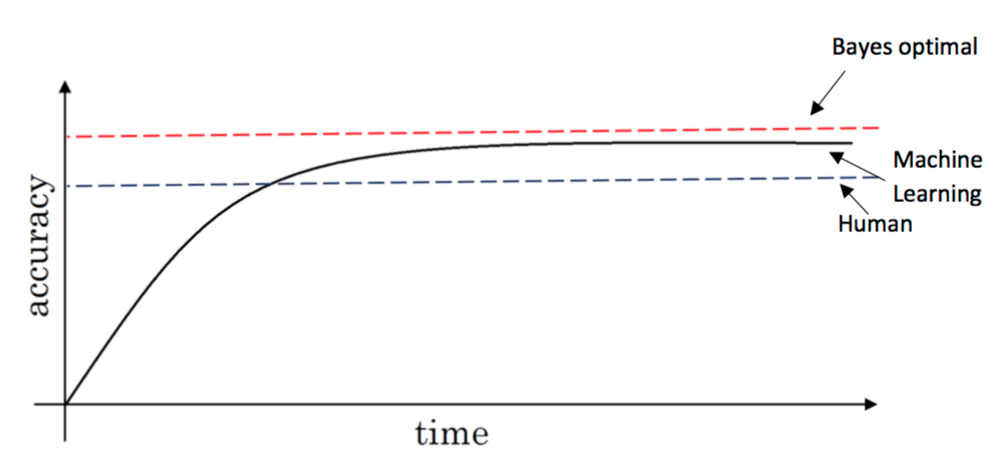


### **Why Progress Slows Post-Human-Level**

1. **Humans are already near Bayes optimal** for many tasks (like image or speech recognition), so there’s less room for further improvement.
2. **Helpful Tools Become Less Useful**:

   * When ML < human: You can collect better labels, do error analysis, and compare mistakes.
   * When ML > human: These tactics no longer help as much, since humans can't identify errors the algorithm is making.


### **Bias and Variance**

* Knowing human-level performance helps guide whether you should focus on reducing **bias** (underfitting) or **variance** (overfitting).
* This will be elaborated in upcoming videos.


### 🎯 **Using Human-Level Performance to Guide ML Improvement**

#### ✅ **Key Concept: Human-Level Error ≈ Bayes Error**

* Human-level performance is often used as a **proxy for Bayes optimal error**, especially in tasks where humans perform well (e.g., image recognition).
* **Bayes error** is the lowest possible error rate due to inherent data ambiguity — it can't be beaten without overfitting.


### 🔍 **Bias vs. Variance Diagnosis Using Human-Level Error**

1. **Scenario A – Low Human Error (e.g., 1%)**

   * ML training error: 8%, dev error: 10%
   * Human error: 1% → ML has **high avoidable bias**
   * ➤ Focus on **reducing bias** (e.g., bigger model, more training, better architecture)

2. **Scenario B – High Human Error (e.g., 7.5%)**

   * Same training/dev error: 8%/10%
   * Human error: 7.5% → ML is close to optimal on training
   * ➤ Focus on **reducing variance** (e.g., regularization, more data)


### **Terminology Introduced**

* **Avoidable Bias** = Training error – Bayes (or human-level) error
* **Variance** = Dev error – Training error


### **Strategic Insight**

* Depending on how close your training error is to human-level error:

  * If far → prioritize bias reduction
  * If close → prioritize variance reduction
* This nuanced view helps you choose the most effective improvement strategy.



## **Defining Human-Level Performance More Precisely**

### **Human-Level Performance as a Proxy for Bayes Error**

* **Bayes error**: The lowest possible error any function can achieve.
* **Human-level error** serves as an estimate of Bayes error — particularly helpful in guiding bias vs. variance decisions.


### **Example: Medical Image Classification**

* Error rates:

  * Typical human: 3%
  * Typical doctor: 1%
  * Experienced doctor: 0.7%
  * **Team of experienced doctors**: 0.5%
* **Best estimate of Bayes error**: 0.5%, since a team of doctors achieves that — nothing can do better than that without overfitting.


### **Why This Matters**

* When analyzing **bias and variance**:

  * **Avoidable Bias** = Training error – Bayes error (estimated via human-level error)
  * **Variance** = Dev error – Training error

---

### 🔍 **Three Examples**

1. **Training error = 5%, Dev = 6%**

   * Human-level: 0.5%–1%
   * Large **bias** problem → focus on **bias reduction**

2. **Training = 1%, Dev = 5%**

   * Small bias, large **variance** → focus on **variance reduction**

3. **Training = 0.7%, Dev = 0.8%**

   * Bias vs. variance decision depends on **precise estimate** of Bayes error:

     * If Bayes error is 0.5%, then bias = 0.2%, variance = 0.1%
     * If you incorrectly assume Bayes error = 0.7%, you might miss the bias issue


### **Challenges Near Human-Level Performance**

* As performance approaches human level:

  * It's harder to estimate Bayes error
  * Small errors in estimation can mislead your focus
  * Progress slows and decisions become more nuanced


### **Key Takeaways**

* **Choose your definition of human-level error based on your goal**:

  * For **research or deployment**: Beating a typical doctor may be enough
  * For **error analysis and model improvement**: Use the **best-performing human (or team)** as the benchmark
* Having a solid estimate of Bayes error allows for better decisions on whether to reduce **bias** or **variance**
* This is especially important in noisy or complex tasks (e.g., speech recognition, medical imaging)

# Improving a model performance


### **Systematic Approach to Improving ML Performance**

#### **Core Goals of a Supervised Learning Algorithm**

1. **Fit the training set well** → Low **avoidable bias**
2. **Generalize to the dev/test set** → Low **variance**


### **Key Concepts Reviewed**

* **Orthogonalization**: Tackle bias and variance separately with different tools.
* **Human-level performance** as a **proxy for Bayes error**: Helps estimate the best achievable performance.
* **Avoidable bias** = Training error – Bayes error (proxy)
* **Variance** = Dev error – Training error


### **Tactics for Reducing Avoidable Bias**

* Train a **larger model**
* **Train longer**
* Use a **better optimizer** (e.g., Adam, RMSprop)
* Improve **architecture/hyperparameters**

  * Change number of layers/units
  * Try different activation functions
  * Use other model types (e.g., CNNs, RNNs)


### **Tactics for Reducing Variance**

* **Get more training data**
* Use **regularization** (L2, dropout)
* Apply **data augmentation**
* Improve **architecture/hyperparameters**


### **Final Thoughts**

* These bias/variance tools are **simple in concept but hard to master**
* Applying them **systematically** makes you far more effective than many ML teams
* Upcoming homework will give you practice applying these strategies

# Error Analysis

Here's a **summary** of the lecture on **error analysis**:


### **Error Analysis: A Tool to Guide ML Improvement**

#### **Core Idea**

If your ML algorithm underperforms compared to humans, manually inspecting its **errors** helps prioritize what to fix. This process is called **error analysis**.


### **Step-by-Step Error Analysis**

1. **Collect a small set** (e.g., 100) of **mislabeled dev set examples**.
2. **Manually examine** each one.
3. **Categorize the errors** (e.g., dogs misclassified as cats, blurry images, great cats like lions misrecognized).
4. **Count the frequency** of each error type to estimate:

   * How often each issue occurs.
   * The **maximum potential improvement** ("performance ceiling") if that issue were fixed.


### **Example: The "Dog Problem"**

* Suppose 5 out of 100 errors are dogs → solving it drops error from 10% to 9.5% (small gain).
* If 50 out of 100 are dogs → solving it could cut error to 5% (big gain).
* This **quick analysis** saves months of possibly unproductive work.


### **Evaluating Multiple Ideas**

* Create a **table or spreadsheet** with:

  * Rows: misclassified examples
  * Columns: each proposed error type (dogs, great cats, blurry images, etc.)
  * Optional comments for context
* Tally percentages per category to **prioritize** high-impact fixes.


### **Dynamic Process**

* As you analyze, you might notice **new error categories** (e.g., Instagram filters). Add them on the fly.
* This flexible process reveals which fixes have the **highest return on effort**.


### **Takeaways**

* Error analysis is **fast (minutes to hours)** and **highly effective**.
* It helps you **focus efforts** on error types that offer the biggest accuracy gains.
* It’s not a rigid formula, but a **strategic guide** to improvement.

# Cleaning up incorrectly labeled data


### 1. **Incorrect vs. Mislabeled Examples**

* **Incorrectly labeled examples**: Labels in the dataset that are wrong (e.g., a dog labeled as a cat).
* **Mislabeled examples**: The model's prediction differs from the label.

### 2. **Handling Incorrect Labels in the Training Set**

* Deep learning models are generally **robust to random label errors** in training data.
* If label errors are **random and infrequent**, you may not need to fix them.
* **Systematic labeling errors** (e.g., always labeling white dogs as cats) are more harmful and should be corrected.
* Fixing labels in the training set can help, but it’s not always essential if the dataset is large and the error rate is low.

### 3. **Handling Incorrect Labels in the Dev/Test Sets**

* Incorrect labels here are more critical because these sets **evaluate model performance**.
* During error analysis, add a column to **flag wrongly labeled examples**.
* Analyze the fraction of dev/test set errors due to incorrect labels.

  * Example:

    * 10% dev set error, 6% of errors due to bad labels → 0.6% of total.
    * If total error drops to 2%, that same 0.6% becomes 30% of remaining errors.
    * **High relative impact** → more worthwhile to fix the labels.

### 4. **When to Fix Labels**

* Fix dev/test labels if it **improves your ability to choose between models**.
* If incorrect labels obscure model performance comparisons (e.g., 1.9% vs. 2.1% error), then fixing them helps.

### 5. **Guidelines for Fixing Labels**

* Apply label-fixing **consistently to both dev and test sets** to keep them from the same distribution.
* Consider checking **both correct and incorrect predictions**, to avoid biasing results in favor of the model.
* It’s **not always necessary to fix training set labels**, especially if it's large and label noise is random.

### 6. **General Advice**

* Practical machine learning still often requires **manual error analysis**.
* Looking at actual examples (even a few hundred) is valuable and worth the time to understand model behavior and prioritize improvements.
* Manual inspection is often undervalued but can guide better decision-making.

# Build first system quickly, then iterate

When starting a new ML project:

1. **Build an initial version fast**, even if it's “quick and dirty.”
2. **Don’t overthink the first system** — avoid making it overly complex upfront.


### **Why This Works**

* New ML problems often have **many possible directions** to improve performance (e.g., handling noise, accents, far-field audio, etc.).
* Without real system data, it's hard to **prioritize** effectively.
* Building something quickly gives you:

  * A **baseline system**.
  * A way to perform **bias/variance analysis**.
  * A way to conduct **error analysis**.
  * Insight into **which issues matter most** in practice.


### **Process**

1. **Set up a dev/test set and evaluation metric** (place your “target”).
2. **Train a basic system quickly.**
3. **Analyze its performance** to decide what to improve next (e.g., fix far-field speech issues if that's a major error source).
4. **Iterate** based on findings.


### **When You Can Skip This Approach**

* You **have prior experience** with the exact problem.
* There's a **well-established body of literature** you can rely on (e.g., face recognition).


### **Common Pitfall**

* More teams **overthink and build systems too complex** than those who build systems too simple.


### **Bottom Line**

If your goal is to **get something that works**, not invent new ML algorithms, then:

> **Build a simple system fast, then improve it using error and bias/variance analysis.**

# Mismatching train/dev/test sets distributions


### **1. Deep learning thrives on large training datasets.**

* More data = generally better model performance.
* Teams often use **all available data**, even if it doesn't match the desired distribution.


### **2. Problem: Mismatched Training and Test Distributions**

* Training data may come from a **different source** than the **dev/test data**.

  * Example: Mobile app with 10k user-uploaded cat pictures (amateur, blurry) vs. 200k high-quality internet cat images.


### **3. Common Mistake: Mixing All Data Randomly**

* Mixing web and mobile images into a **single shuffled dataset** for train/dev/test creates a dev/test set dominated by irrelevant (web) images.
* Result: Your system will optimize for the wrong distribution.


### **4. Recommended Strategy: Keep Dev/Test from Target Distribution**

* **Training set**: Use all available data (even if mismatched), add half of the target distribution (mobile app) so that your model trains on the different distributions.
* **Dev/Test sets**: Use only data from the **target distribution** (e.g., mobile app).
* This ensures your team **optimizes for the right problem.**


### **5. Example: Speech-Activated Rearview Mirror**

* Training: 500k utterances from other domains (smart speakers, etc.).
* Dev/Test: 20k utterances each from real rearview mirror users.
* Optional: Put some mirror data in training too, to help bridge the gap. (10k from real rearview mirror data and the 500k from other domains)


### **6. Bottom Line**

* **Train on more data**, even from different distributions, **if** dev/test sets reflect the true target use case.
* This setup:

  * Enables more effective learning.
  * Provides clear performance evaluation.
  * Helps prioritize model improvements.

# Bias and Variance with mismatched data distributions

When training and dev/test sets come from different distributions, traditional bias-variance analysis must be adjusted. Here’s a breakdown of how to handle this scenario:

#### **Key Concepts**

1. **Bayes Error (Human-Level Performance)**: The theoretical minimum error, often approximated by human-level performance.


2. **Standard Analysis (Same Distribution)**:

   * If training error is low (e.g., 1%) and dev error is high (e.g., 10%), it's typically a **variance problem**—your model doesn't generalize well.


3. **Different Distributions Issue**:

   * When training and dev sets come from different distributions, a dev set error spike may not indicate variance—it could just mean the dev set is harder.
   * You’ve changed **two things at once**: data distribution and whether the model has seen the data.


4. **Training-Dev Set**:

   * Create a **training-dev** set from the **same distribution as training** but don’t train on it.
   * Analyze:

     * **Training vs. Training-Dev**: Indicates **variance**.
     * **Training-Dev vs. Dev**: Indicates **data mismatch**.
     * **Training vs. Human-Level Error**: Indicates **avoidable bias**.


5. **Examples**:

   * **High variance**: Training error = 1%, Training-Dev = 9%, Dev = 10%.
   * **Data mismatch**: Training = 1%, Training-Dev = 1.5%, Dev = 10%.
   * **High bias**: Training = 10%, Training-Dev = 11%, Dev = 12%.
   * **Bias + Data mismatch**: Training = 10%, Training-Dev = 11%, Dev = 20%.


6. **General Error Table**:

   * Rows: Human-level error, training error (seen data), error on unseen data.
   * Columns: Different datasets (e.g., general speech vs. rear-view mirror speech).
   * Helps to analyze avoidable bias, variance, and data mismatch comprehensively.


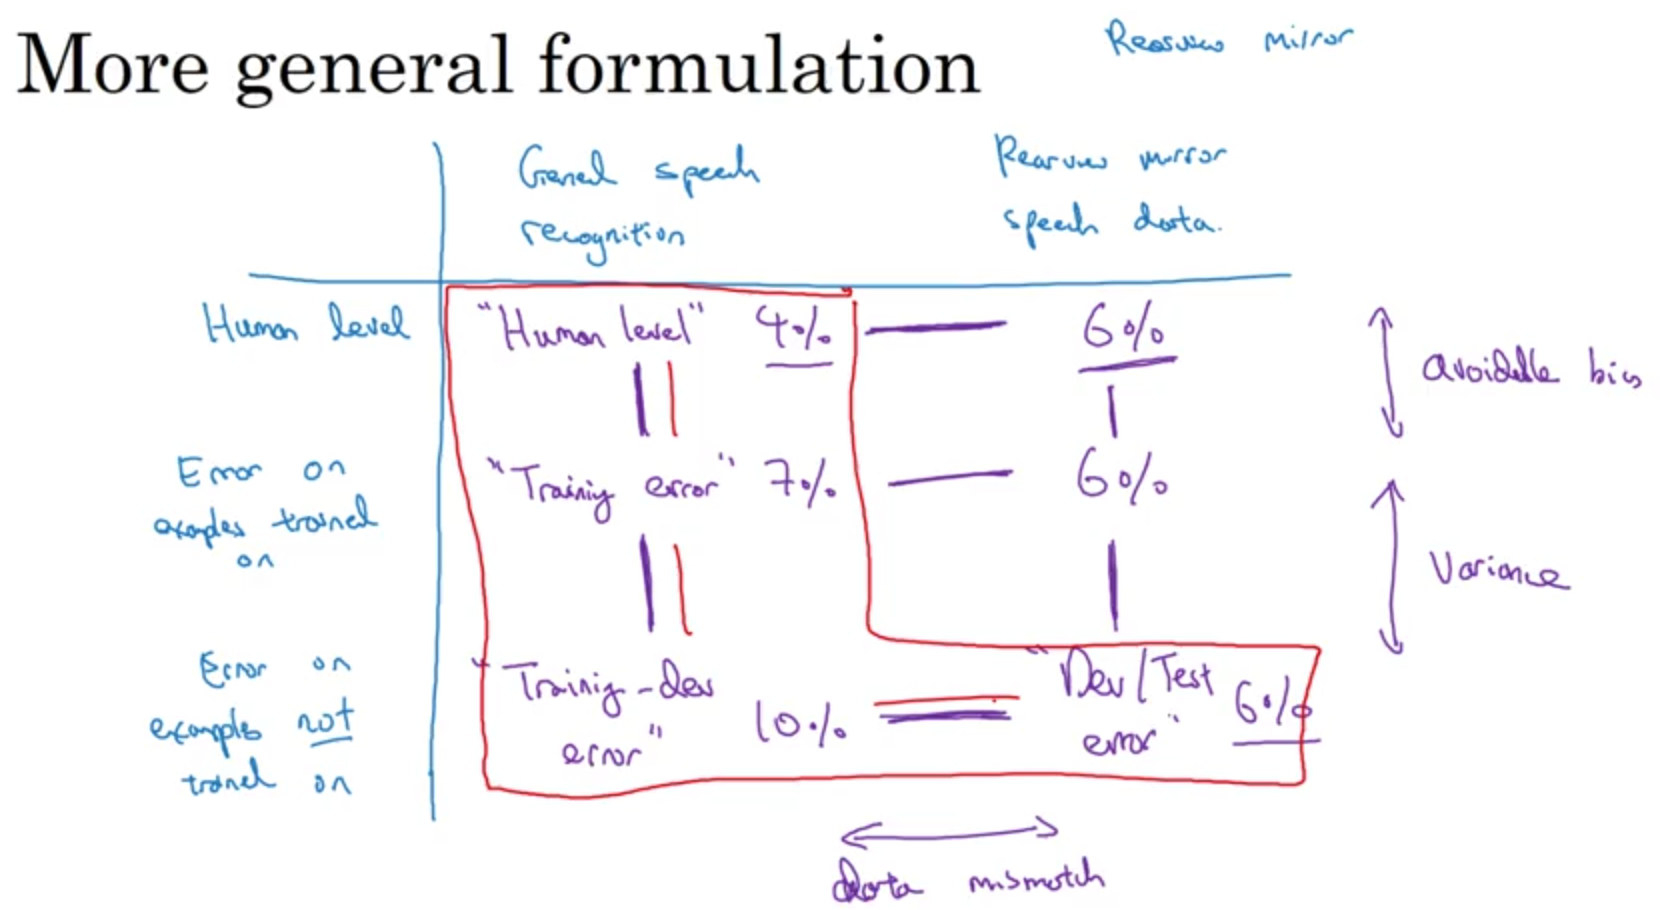



7. **Insights from the Table**:

   * Gaps between human-level error and training = **bias**.
   * Training vs. training-dev = **variance**.
   * Training-dev vs. dev = **data mismatch**.
   * Dev vs. test = **overfitting to dev set**.


8. **Addressing Data Mismatch**:

   * Not systematic solutions, but some heuristics:

     * Try collecting more dev/test-like data.
     * Use domain adaptation techniques.
     * Pre-train on broader data, fine-tune on specific distribution.
  

### **When You Have a Data Mismatch Problem:**

1. **Perform Manual Error Analysis:**

   * Analyze the **dev set** (not the test set) to identify how it differs from the training set.
   * Example: In a speech-based application, you may discover that dev data has **more background noise** or includes **more navigational commands** like street numbers.

2. **Strategies to Address the Mismatch:**

   * **Make Training Data More Similar** to the dev/test set by:

     * Collecting more real-world data similar to the dev/test set.
     * Using **artificial data synthesis** to simulate such conditions (e.g., adding car noise to clean audio).

3. **Artificial Data Synthesis:**

   * **In Speech Recognition:** Mix clean speech with recorded car noise to simulate in-car audio.
   * **In Computer Vision:** Use computer graphics (e.g., from video games) to generate synthetic images.
   * Benefits: Helps close the gap between training and dev/test distribution without collecting real-world data.
   * **Caution:** Overfitting risk if synthetic data covers only a **narrow subset** of the real-world distribution (e.g., reusing the same 1-hour noise clip or only 20 types of cars).

4. **Key Takeaway:**

   * Artificial data synthesis can be **highly effective**, but be careful to **diversify** synthetic data to avoid overfitting.
   * There is **no guaranteed or systematic fix**, but targeted effort based on error analysis often leads to progress.

# Transfer learning

**Transfer Learning** is a technique in machine learning and deep learning where a model developed for one task is reused (either in whole or in part) as the starting point for a model on a second task. This is especially useful when the second task has **limited data**, but is somewhat **related** to the first task.

Rather than training a model from scratch (which requires large datasets and high computational cost), transfer learning leverages the *knowledge* a model has already gained from solving a different, often larger, problem.


### Why Use Transfer Learning?

* **Efficient training**: Saves time and computational resources.
* **Improved performance**: Boosts accuracy, especially when the target task has little labeled data.
* **Low-data scenarios**: Essential in fields like medical imaging where data is scarce or expensive to label.


### How Does It Work?

1. **Pretraining (Task A)**:
   Train a neural network on a large dataset (e.g., ImageNet with millions of labeled images for classification: cats, dogs, birds, etc.). This helps the network learn general features like edges, textures, shapes in early layers and more complex representations in deeper layers.

2. **Transfer (to Task B)**:
   Adapt the pre-trained network to a new but related task (e.g., X-ray image classification with few samples). There are two main strategies:

   * **Feature Extraction**:
     Freeze all layers except the final layer(s). Replace the last layer(s) with new ones specific to Task B and train only those.

     > ✅ Best when you have **very little data** for Task B.

   * **Fine-Tuning**:
     Start with the pretrained weights and **continue training** the whole network (or a subset of deeper layers) on the new dataset.

     > ✅ Works well when you have **moderate to large data** for Task B.


### 🏗️ Implementation Steps

1. **Load a Pretrained Model** (e.g., ResNet, BERT, Wav2Vec)
2. **Remove the Output Layer** specific to the original task
3. **Add New Layers** tailored to your new task (e.g., softmax for classification)
4. **Freeze or Fine-Tune**:

   * Freeze the base model if data is limited.
   * Fine-tune deeper layers if more data is available.
5. **Train** on your Task B dataset.


### Example 1: Image Classification → Medical Diagnosis

* **Task A**: Train on ImageNet (millions of photos: cats, cars, etc.)
* **Task B**: Classify lung conditions in chest X-rays
* **Why it works**: Early layers learn general image features (edges, corners, blobs) that are also useful in X-rays.
* **Process**: Replace and train only the final layer on radiology data, or fine-tune the whole network if more medical images are available.


### Example 2: Speech Recognition → Wake Word Detection

* **Task A**: Train a speech-to-text model on 10,000 hours of voice data.
* **Task B**: Train a wake-word detector (e.g., “Hey Siri”) using only 1 hour of data.
* **Why it works**: The model has already learned features like phonemes, intonation, and speech patterns.
* **Process**: Add new layers for wake word detection and retrain them (maybe fine-tune a few earlier layers too).


### When Transfer Learning Does *Not* Help

Transfer learning is **not effective** when:

* **Task A has less or unrelated data** compared to Task B.
* **Input data types differ** (e.g., images vs. text).
* **Target task is too different** (e.g., learning cats vs. solving math equations).

> **Example**: You have 10,000 radiology images but only 100 cat pictures → training directly on radiology images is better.

# Multi-task learning

**Multi-Task Learning (MTL)** is a machine learning paradigm where **a single model is trained to perform multiple tasks simultaneously**. Rather than training separate models for each task, MTL leverages a **shared representation**—typically the earlier layers of a neural network—while allowing some specialization in later layers.

> Multi-task learning is the idea of training one model to solve multiple tasks at the same time by sharing representations, with the goal that learning one task can help improve the performance on the others.


## How It Works

1. **Shared Neural Network Layers**: The first layers of the network learn general-purpose features (edges, shapes, patterns, etc.).
2. **Task-Specific Outputs**: The final layers split into **multiple heads**, each dedicated to a specific task.
3. **Loss Calculation**: Each task produces its own loss. The overall loss is usually a **sum (or weighted sum)** of the individual task losses.
4. **Backpropagation**: During training, gradients from all tasks contribute to updating the shared weights. This encourages the model to learn representations that are **useful across tasks**.


## Implementation Example: Self-Driving Car

**Problem**: Detect multiple entities from a car’s camera image:

* Pedestrians
* Cars
* Stop signs
* Traffic lights

Instead of training 4 separate models, use **one neural network** that outputs 4 values:

```python
# Output y_hat = [p_pedestrian, p_car, p_stop_sign, p_traffic_light]
```

Each output node predicts the presence (1) or absence (0) of the object.

### Example Label for One Image

```python
y = [0, 1, 1, 0]  # No pedestrian, yes car, yes stop sign, no traffic light
```

### Loss Function

If using **binary cross-entropy** for each output, the total loss is:

$$
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{4} \text{logistic loss}(y^{(i)}_j, \hat{y}^{(i)}_j)
$$

> If some labels are missing (unlabeled), **skip** those terms in the summation.


## When to Use Multi-Task Learning

MTL is particularly useful when:

1. **Tasks are related** and can benefit from **shared features**.

   * E.g., Pedestrian and car detection both need edge and shape detection.
2. You have **roughly equal amounts of data** for each task.

   * Otherwise, high-data tasks might dominate the shared features.
3. You can train a **large enough model** to handle the capacity needed by all tasks.

   * A too-small network might not have the capacity to perform all tasks well.


## Benefits

* **Improved generalization**: Learning multiple tasks acts as a regularizer, reducing overfitting.
* **Data efficiency**: Tasks with less data benefit from those with more.
* **Computational efficiency**: One model is faster and smaller than several.


## Challenges

* **Negative transfer**: Learning some tasks might hurt others if they're too dissimilar.
* **Imbalanced data**: If some tasks dominate in data size, the model might underperform on the smaller tasks.
* **Hyperparameter tuning**: You may need to weight losses or tune architectures carefully.


## Example Use Cases

| Domain                          | Tasks                                                                        |
| ------------------------------- | ---------------------------------------------------------------------------- |
| **Computer Vision**             | Object detection (multiple objects), face recognition (age, gender, emotion) |
| **Natural Language Processing** | Named Entity Recognition + POS tagging + Sentiment                           |
| **Speech Recognition**          | Predict phonemes + speaker ID                                                |
| **Healthcare**                  | Predict multiple diagnoses from patient data                                 |

# End to end deep learning

### **Definition:** End-to-end deep learning replaces traditional multi-stage systems with a single neural network that learns to map input directly to output.


### **Example – Speech Recognition:**

  * *Traditional:* Involves feature extraction (e.g., MFCC), phoneme recognition, word assembly, and then transcript generation.
  * *End-to-End:* Trains one large neural net to go directly from audio to transcript.
  * *Limitation:* Requires very large datasets (e.g., 10,000+ hours of audio) to perform well. With smaller datasets, traditional methods can still outperform.


### **Not Always the Best Approach:**

* **Face Recognition Turnstiles:**

  * *Failed End-to-End:* Directly mapping camera image to identity is too complex due to varying poses, distances, and angles.
  * *Effective Two-Step:*

    1. Detect and crop the face.
    2. Compare cropped face to database using a neural net.
  * *Reason:* More data is available for face detection and face verification separately than for the full end-to-end task.


### **Other Examples:**

* **Machine Translation:**

  * Works well with end-to-end learning because of the availability of large parallel text corpora (e.g., English–French sentence pairs).

* **Pediatric Bone Age Estimation:**

  * *Traditional:* Segment bones and compare lengths to age charts.
  * *End-to-End:* Going directly from X-ray to age doesn't work well due to lack of data.
  * *Conclusion:* A hybrid or two-step approach is more feasible.


### **Key Takeaways:**

* **Advantages of End-to-End Learning:**

  * Simplifies system design.
  * Eliminates hand-crafted features.
  * Often yields better performance *if* sufficient labeled data is available.

* **Limitations:**

  * Requires large datasets.
  * Harder to debug.
  * Less effective when intermediate components are well-understood and data for full mapping is scarce.

* **Conclusion:** End-to-end deep learning is powerful, but not always the best choice. Intermediate or hybrid approaches can still be more practical depending on the task and available data.

### When to use end to end

#### **Pros of End-to-End Deep Learning**

1. **Lets the data speak**: With enough labeled (X, Y) data, a deep neural network can learn the best representation and function, possibly surpassing hand-designed heuristics.
2. **Avoids human bias**: By not imposing human-designed features (like phonemes in speech recognition), it may find better, data-driven representations.
3. **Simplifies system design**: Reduces the need for manually designing intermediate components or features.


#### **Cons of End-to-End Deep Learning**

1. **Requires a lot of data**: Learning complex mappings directly from input to output often needs large datasets that include both X and Y.
2. **Excludes useful domain knowledge**: Can't incorporate hand-designed components that may inject valuable expertise, especially helpful when data is limited.
3. **Less modularity**: A purely end-to-end model may be harder to debug or interpret compared to a pipeline with intermediate steps.


### **Guidelines for When to Use It**

* **Use it when**:

  * You have **large labeled datasets**.
  * The mapping from input to output is not overly complex or can be learned with available data.
* **Avoid it when**:

  * You lack sufficient data.
  * The task benefits from **structured intermediate steps** (e.g., object detection before planning in autonomous driving).
  * Existing domain knowledge can significantly help.


### **Example: Autonomous Driving**

* A *non-end-to-end approach* breaks down the problem: from sensory input → detect objects → plan motion → control commands.
* A *pure end-to-end system* would try to map images directly to steering/braking, which is **less effective** in practice due to data scarcity and task complexity.